# **Оценка стоимости подержанных автомобилей**

## 0. Описание задачи

Проанализировать зависимость стоимости подержанных автомобилей от возраста (года регистрации), используя модель линейной регрессии. По найденной зависимости определить, какие предложения о продаже наиболее выгодные.

In [8]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 1. Загрузка данных

In [9]:
# Загрузка данных
df = pd.read_csv('data/autos.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

- `dateCrawled`	- Дата обхода автомобиля. (Date)
- `name` - Название автомобиля. (String)
- `seller`	- Тип продавца (частный или дилер). (String)
- `offerType`	- Тип предложения (например, продажа, ремонт и т.д.). (String)
- `price`	- Цена автомобиля. (Integer)
- `abtest`	- Тип теста abtest (A или B). (String)
- `vehicleType`	- Тип транспортного средства (например, внедорожник, седан и т.д.). (String)
- `yearOfRegistration`	- Год, в котором был зарегистрирован автомобиль. (Integer)
- `gearbox`	- Тип коробки передач (механическая или автоматическая). (String)
- `powerPS`	- Мощность автомобиля в л.с. (Integer)
- `model`	- Модель автомобиля. (String)
- `kilometer`	- Пробег в км. (Integer)
- `monthOfRegistration`	- Месяц, в котором был зарегистрирован автомобиль. (Integer)
- `fuelType`	- Тип топлива (например, дизельное топливо, бензин и т.д.). (String)
- `brand`	- Марка автомобиля. (String)
- `notRepairedDamage`	- Есть ли неотремонтированные повреждения автомобиля. (String)
- `dateCreated`	- Дата выпуска автомобиля. (Date)
- `nrOfPictures`	- Количество фотографий автомобиля. (Integer)
- `postalCode`	- Почтовый индекс автомобиля. (Integer)
- `lastSeen`	- Дата последнего осмотра автомобиля. (Date)

## 2. Визуализация, обработка данных их характеристики

График зависимости стоимости автомобилей от года регистрации. На графике видны явные выбросы со значениями цены более 2 млрд, а также выбросы по году регистрации (год регистрации точно не может быть менее 1900 и более 2023).

In [20]:
df['yearOfRegistration']

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, Length: 371528, dtype: int64

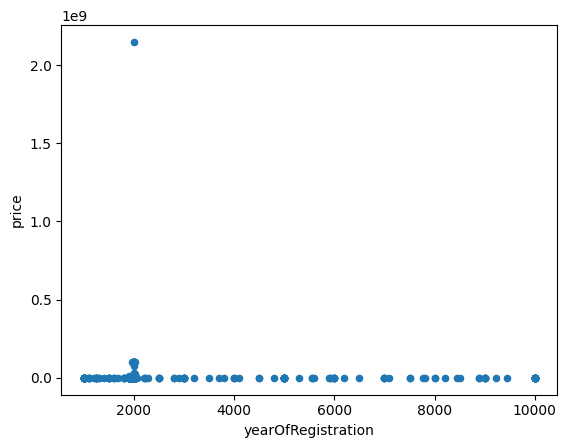

In [15]:
df.plot(kind='scatter', x='yearOfRegistration', y='price')
pass

Диаграммы рассеивания

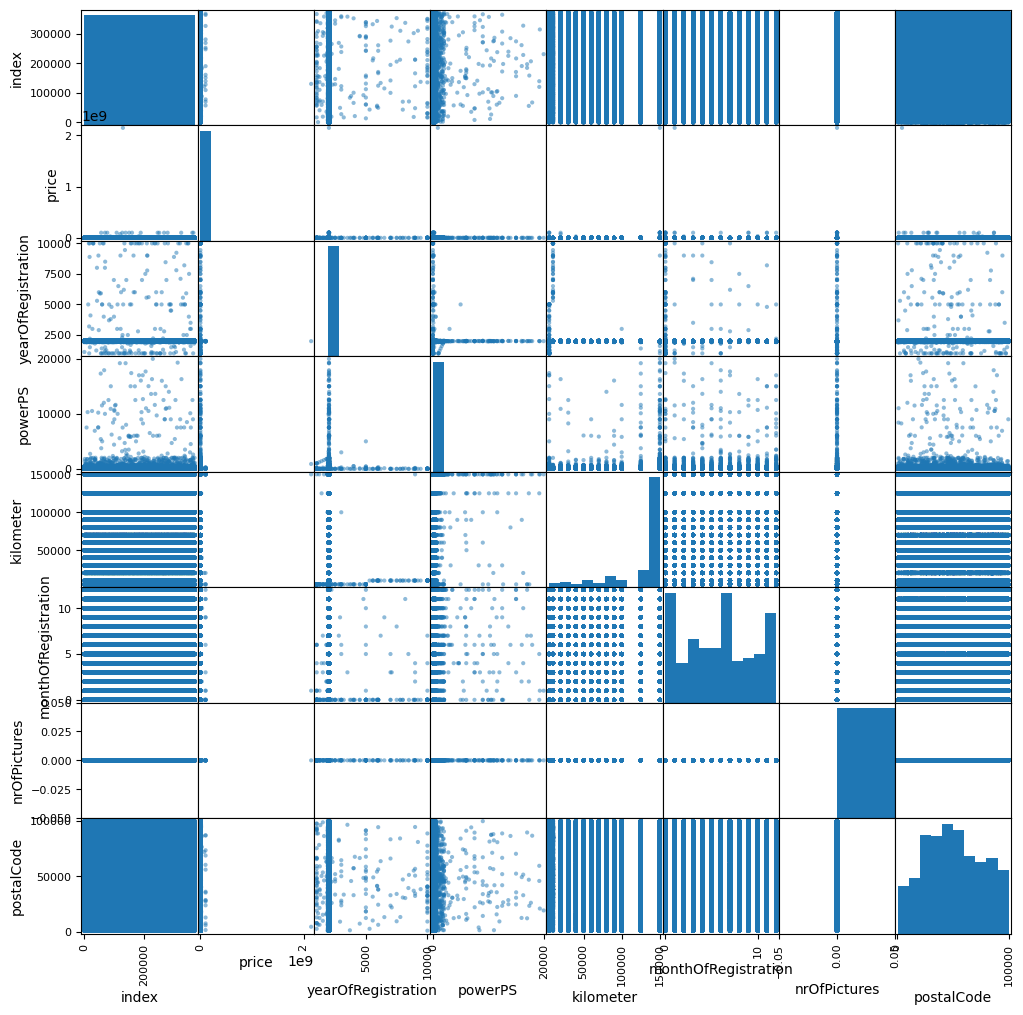

In [14]:
pd.plotting.scatter_matrix(df, figsize = (12, 12))
pass

In [ ]:
Для обнаружения выбросов найдем квантили для признаков price и yearOfRegistration:

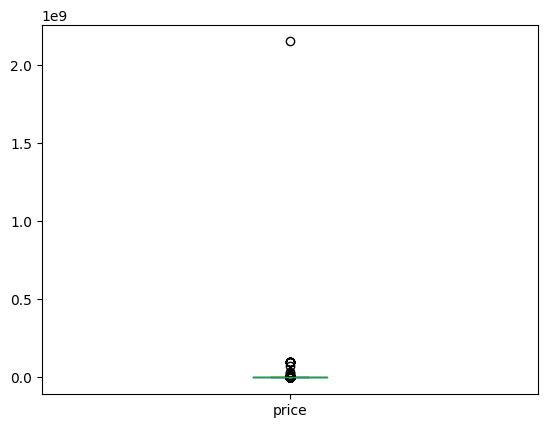

In [25]:
df['price'].plot(kind='box')
pass

In [72]:
df['price'].quantile([0.005,.01,.03,.035,.05,.1,.15,.2,.25,.5,.9,.95,.99,.995])

0.005        0.0
0.010        0.0
0.030        1.0
0.035       80.0
0.050      200.0
0.100      500.0
0.150      700.0
0.200      900.0
0.250     1150.0
0.500     2950.0
0.900    14000.0
0.950    19790.0
0.990    36000.0
0.995    47500.0
Name: price, dtype: float64

Как можно видеть, значения цен 94,5% автомобилей находятся в пределах от 200 до 47500 евро (это значения квантилей, соответствующих уровням  0.05 и  0.995 соответственно).

In [55]:
df[df['price']<=500.0]

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
7,7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,...,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
15,15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450€_VB,privat,Angebot,450,test,kleinwagen,1910,NaN,...,ka,5000,0,benzin,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
16,16,2016-04-01 12:46:46,Polo_6n_1_4,privat,Angebot,300,test,NaN,2016,NaN,...,polo,150000,0,benzin,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
23,23,2016-03-12 19:43:07,Stadtflitzer,privat,Angebot,450,test,kleinwagen,1997,manuell,...,arosa,150000,5,benzin,seat,nein,2016-03-12 00:00:00,0,9526,2016-03-21 01:46:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371473,371473,2016-03-15 19:57:11,Subaru_Allrad,privat,Angebot,400,control,kombi,1991,manuell,...,legacy,150000,0,benzin,subaru,NaN,2016-03-15 00:00:00,0,24558,2016-03-19 15:49:00
371486,371486,2016-03-30 20:55:30,Zu_verkaufen,privat,Angebot,350,control,kleinwagen,1996,NaN,...,punto,150000,0,NaN,fiat,NaN,2016-03-30 00:00:00,0,25436,2016-04-07 13:50:41
371492,371492,2016-04-04 14:41:28,Opel_Corsa_B_Swing_grau,privat,Angebot,390,test,kleinwagen,1997,automatik,...,corsa,100000,6,benzin,opel,ja,2016-04-04 00:00:00,0,17509,2016-04-06 15:46:11
371495,371495,2016-03-31 19:52:33,Opel_Tigra,privat,Angebot,180,control,NaN,1995,NaN,...,NaN,125000,3,benzin,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04


In [56]:
df[(df['price']<=500.0) & (df['notRepairedDamage']!='nein')]

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
15,15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450€_VB,privat,Angebot,450,test,kleinwagen,1910,NaN,...,ka,5000,0,benzin,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
16,16,2016-04-01 12:46:46,Polo_6n_1_4,privat,Angebot,300,test,NaN,2016,NaN,...,polo,150000,0,benzin,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
24,24,2016-03-13 20:40:49,MERCEDES_200E__TÜV_04/2016,privat,Angebot,500,test,limousine,1990,manuell,...,andere,150000,10,benzin,mercedes_benz,ja,2016-03-13 00:00:00,0,35390,2016-03-13 20:40:49
40,40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,privat,Angebot,0,test,NaN,1990,NaN,...,corsa,150000,1,benzin,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371473,371473,2016-03-15 19:57:11,Subaru_Allrad,privat,Angebot,400,control,kombi,1991,manuell,...,legacy,150000,0,benzin,subaru,NaN,2016-03-15 00:00:00,0,24558,2016-03-19 15:49:00
371486,371486,2016-03-30 20:55:30,Zu_verkaufen,privat,Angebot,350,control,kleinwagen,1996,NaN,...,punto,150000,0,NaN,fiat,NaN,2016-03-30 00:00:00,0,25436,2016-04-07 13:50:41
371492,371492,2016-04-04 14:41:28,Opel_Corsa_B_Swing_grau,privat,Angebot,390,test,kleinwagen,1997,automatik,...,corsa,100000,6,benzin,opel,ja,2016-04-04 00:00:00,0,17509,2016-04-06 15:46:11
371495,371495,2016-03-31 19:52:33,Opel_Tigra,privat,Angebot,180,control,NaN,1995,NaN,...,NaN,125000,3,benzin,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04


In [54]:
df[df['notRepairedDamage']!='nein'].shape

(108346, 21)

Большая часть автомобилей с ценой менее 500 евро имеют неотремонтированные повреждения. Это доля равняется 29655/41732≈0.71, то есть около 71%.

In [36]:
df[df['price']>700.0]

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,...,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


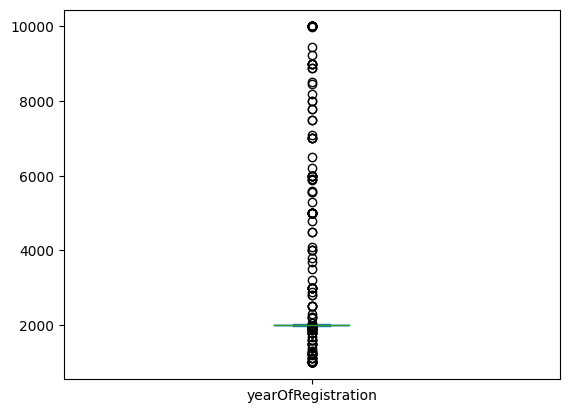

In [57]:
df['yearOfRegistration'].plot(kind='box')
pass

In [76]:
df['yearOfRegistration'].quantile([0.005,.01,.05,.1,.2,.25,.5,.9,.95,.99,.995])

0.005    1970.0
0.010    1978.0
0.050    1992.0
0.100    1995.0
0.200    1998.0
0.250    1999.0
0.500    2003.0
0.900    2013.0
0.950    2016.0
0.990    2018.0
0.995    2018.0
Name: yearOfRegistration, dtype: float64

Год регистрации 99% автомобилей находится в пределах от 1970 до 2018 года (это значения квантилей, соответствующих уровням  0.005 и  0.995 соответственно).

Удалим строки таблицы, в которых `yearOfRegistration` выходит за пределы квантилей  0.005 и 0.995 и в которых `price` выходит за пределы квантилей 0.05 и 0,995.

In [77]:
data = df[(df['price']>=200.0) & (df['price']<=47500.0) & (df['yearOfRegistration']>=1970) & (df['yearOfRegistration']<=2018)]

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350763 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                350763 non-null  int64 
 1   dateCrawled          350763 non-null  object
 2   name                 350763 non-null  object
 3   seller               350763 non-null  object
 4   offerType            350763 non-null  object
 5   price                350763 non-null  int64 
 6   abtest               350763 non-null  object
 7   vehicleType          319291 non-null  object
 8   yearOfRegistration   350763 non-null  int64 
 9   gearbox              335289 non-null  object
 10  powerPS              350763 non-null  int64 
 11  model                334132 non-null  object
 12  kilometer            350763 non-null  int64 
 13  monthOfRegistration  350763 non-null  int64 
 14  fuelType             323504 non-null  object
 15  brand                350763 non-nu

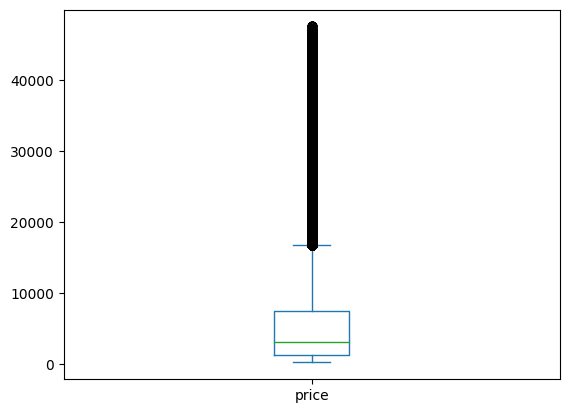

In [79]:
data['price'].plot(kind='box')
pass

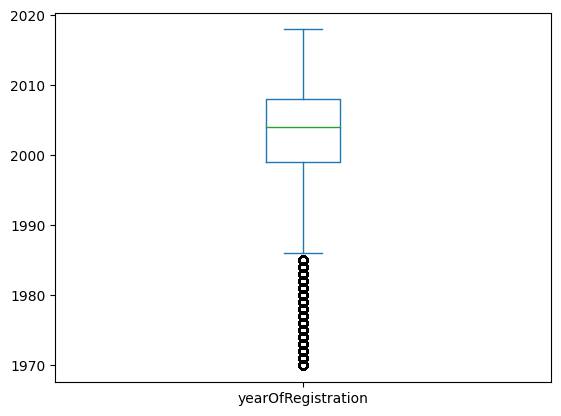

In [80]:
data['yearOfRegistration'].plot(kind='box')
pass

Таблица ниже отражает такие характеристики числовых признаков в обработанных данных: количество, среднее значение, стандартное отклонение, минимальное и максимальное значения, нижний и верхний квартили и медиана.

In [81]:
data.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,350763.000000,350763.000000,350763.000000,350763.000000,350763.000000,350763.000000,350763.0,350763.000000
mean,185787.303895,5621.482297,2003.694381,116.757400,126319.224091,5.845654,0.0,51024.057751
std,107261.946231,6559.046570,6.972957,186.547706,39004.395743,3.668001,0.0,25722.349323
min,0.000000,200.000000,1970.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,92853.500000,1300.000000,1999.000000,75.000000,125000.000000,3.000000,0.0,30853.000000
50%,185829.000000,3150.000000,2004.000000,109.000000,150000.000000,6.000000,0.0,49767.000000
75%,278670.500000,7490.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71665.000000
max,371527.000000,47500.000000,2018.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


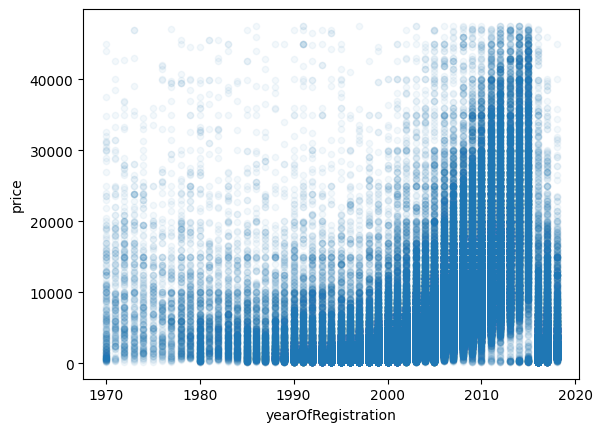

In [89]:
data.plot(kind='scatter', x='yearOfRegistration', y='price', alpha=0.05)
pass

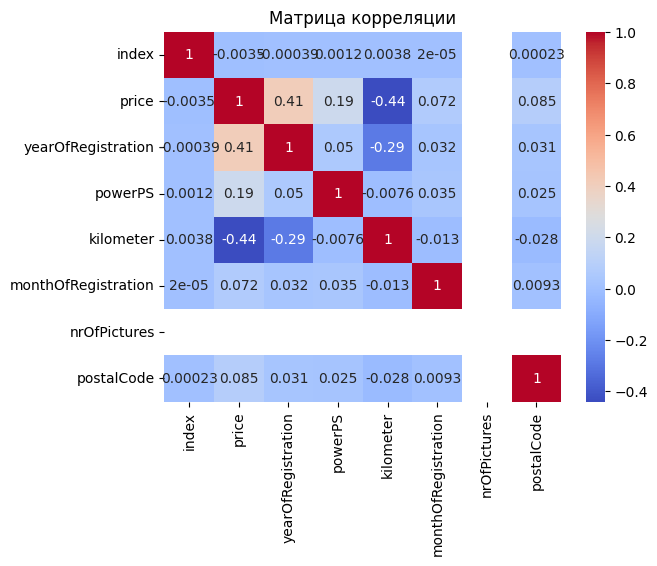

In [85]:
correlation_matrix = data.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Матрица корреляции позволяет определить зависимость (корреляцию) между величинами (признаками). "Теплые" оттенки говорят о том, что с увеличением одной величины, другая также возрастает. "Холодные" оттенки говорят о том, что с увеличением одной величины, другая уменьшается. Таким образом, видно, что стоимость автомобилей возрастает со значением года регистрации, так как более новые автомобили очевидно стоят дороже. А также стоимость автомобилей уменьшается с увеличением значения их пробега, что тоже достаточно очевидно.

# 3. Обработка пропущенных значений

In [90]:
data.isna().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            31472
yearOfRegistration         0
gearbox                15474
powerPS                    0
model                  16631
kilometer                  0
monthOfRegistration        0
fuelType               27259
brand                      0
notRepairedDamage      62770
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

В таблице есть строки с пропушенными значениями.